###### Null Hypothesis: There is no signficant changes in MPG in relation to the vehicle weight
###### Alternate: MPG increases/decreses by weight of vehicle (two tail)

In [64]:
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import combinations 
import seaborn as sns
import statsmodels
from scipy.stats import ttest_ind

In [65]:
# Assuming you have already loaded the data using pd.read_csv
cars = pd.read_csv(r'data/car_data.csv')

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Set the display width option to a large value
pd.set_option('display.width', 1000)

# Print the DataFrame to see all columns
print(cars)

      mpg  cylinders  displacement horsepower  weight  acceleration  model  origin                   car_name
0    18.0          8         307.0      130.0  3504.0          12.0     70       1  chevrolet chevelle malibu
1    15.0          8         350.0      165.0  3693.0          11.5     70       1          buick skylark 320
2    18.0          8         318.0      150.0  3436.0          11.0     70       1         plymouth satellite
3    16.0          8         304.0      150.0  3433.0          12.0     70       1              amc rebel sst
4    17.0          8         302.0      140.0  3449.0          10.5     70       1                ford torino
..    ...        ...           ...        ...     ...           ...    ...     ...                        ...
393  27.0          4         140.0      86.00  2790.0          15.6     82       1            ford mustang gl
394  44.0          4          97.0      52.00  2130.0          24.6     82       2                  vw pickup
395  32.0 

In [66]:
correlation = cars['weight'].corr(cars['mpg'])
print("Correlation between 'weight' and 'mpg':", correlation)

Correlation between 'weight' and 'mpg': -0.8317409332443346


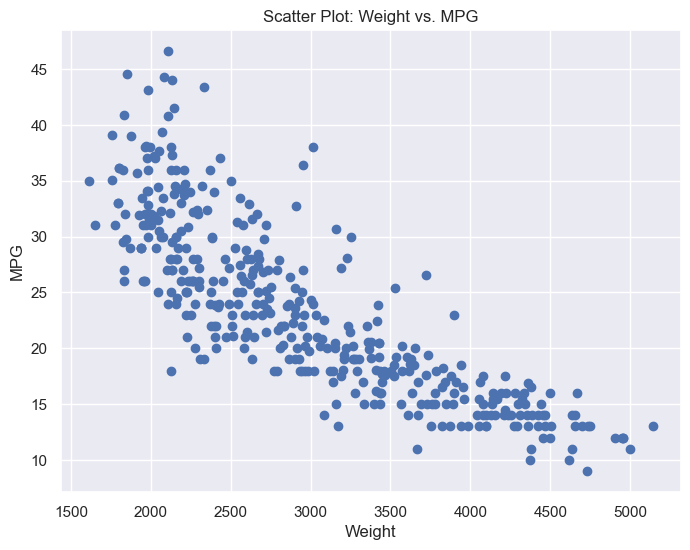

In [67]:
# Create a scatter plot for 'weight' vs. 'mpg'
plt.figure(figsize=(8, 6))
plt.scatter(cars['weight'], cars['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Scatter Plot: Weight vs. MPG')
plt.grid(True)
plt.show()

In [68]:
alpha = 0.05

In [69]:
# Independent t-test
# Used two different samples (mpg, weight)
t = stats.ttest_ind(cars['mpg'], cars['weight'],
    equal_var=False, # Welch's
    alternative='two-sided')
# print(t)

p_value = t[1]
print(p_value)


3.6317583378490467e-224


In [70]:
mpg_values = cars['mpg'].tolist()
weight_values = cars['weight'].tolist()
print(mpg_values)

[18.0, 15.0, 18.0, 16.0, 17.0, 15.0, 14.0, 14.0, 14.0, 15.0, 15.0, 14.0, 15.0, 14.0, 24.0, 22.0, 18.0, 21.0, 27.0, 26.0, 25.0, 24.0, 25.0, 26.0, 21.0, 10.0, 10.0, 11.0, 9.0, 27.0, 28.0, 25.0, 25.0, 19.0, 16.0, 17.0, 19.0, 18.0, 14.0, 14.0, 14.0, 14.0, 12.0, 13.0, 13.0, 18.0, 22.0, 19.0, 18.0, 23.0, 28.0, 30.0, 30.0, 31.0, 35.0, 27.0, 26.0, 24.0, 25.0, 23.0, 20.0, 21.0, 13.0, 14.0, 15.0, 14.0, 17.0, 11.0, 13.0, 12.0, 13.0, 19.0, 15.0, 13.0, 13.0, 14.0, 18.0, 22.0, 21.0, 26.0, 22.0, 28.0, 23.0, 28.0, 27.0, 13.0, 14.0, 13.0, 14.0, 15.0, 12.0, 13.0, 13.0, 14.0, 13.0, 12.0, 13.0, 18.0, 16.0, 18.0, 18.0, 23.0, 26.0, 11.0, 12.0, 13.0, 12.0, 18.0, 20.0, 21.0, 22.0, 18.0, 19.0, 21.0, 26.0, 15.0, 16.0, 29.0, 24.0, 20.0, 19.0, 15.0, 24.0, 20.0, 11.0, 20.0, 21.0, 19.0, 15.0, 31.0, 26.0, 32.0, 25.0, 16.0, 16.0, 18.0, 16.0, 13.0, 14.0, 14.0, 14.0, 29.0, 26.0, 26.0, 31.0, 32.0, 28.0, 24.0, 26.0, 24.0, 26.0, 31.0, 19.0, 18.0, 15.0, 15.0, 16.0, 15.0, 16.0, 14.0, 17.0, 16.0, 15.0, 18.0, 21.0, 20.0, 13.0

In [71]:
# Compare p value to alpha
if p_value > alpha:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")
    
     

We reject the null hypothesis


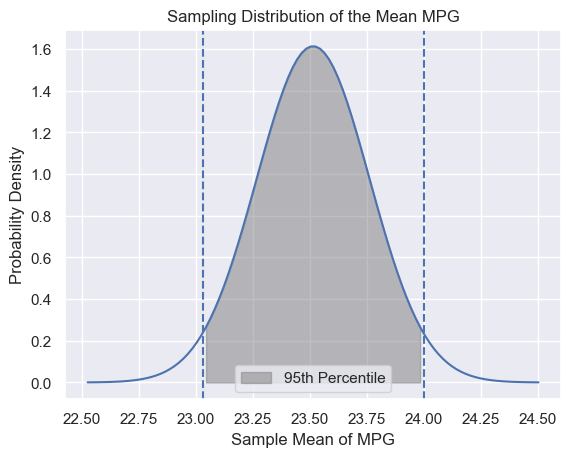

In [72]:
population_mean = cars['mpg'].mean() # caculates the mean of population
population_std = cars['mpg'].std() # caculates standard deviation
# Define the parameters for the alternate hypothesis
sample_size = 1000  # Size of the sample
standard_error = population_std / np.sqrt(sample_size)  # Standard error
# creates random variable
sampling_distribution_null = stats.norm(population_mean, 
                                        population_std / np.sqrt(sample_size))
# rv_alt = norm(loc=sample_mean_alt, scale=standard_error_alt)

x = np.linspace(population_mean - 4 * (population_std / np.sqrt(sample_size)), 
                population_mean + 4 * population_std / np.sqrt(sample_size), 100)

percentile_95 = sampling_distribution_null.ppf(0.975)
percentile_5 = sampling_distribution_null.ppf(0.025)
sns.set_theme()
plt.plot(x, sampling_distribution_null.pdf(x))
plt.axvline(percentile_95, linestyle="--")
plt.axvline(percentile_5, linestyle="--")

# This code shades the area that is between the 95th percentile
plt.fill_between(x, sampling_distribution_null.pdf(x), where=(x <= percentile_95) & (x >= percentile_5) , color='gray', alpha=0.5, label="95th Percentile") 
plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG')
plt.legend()
plt.show()

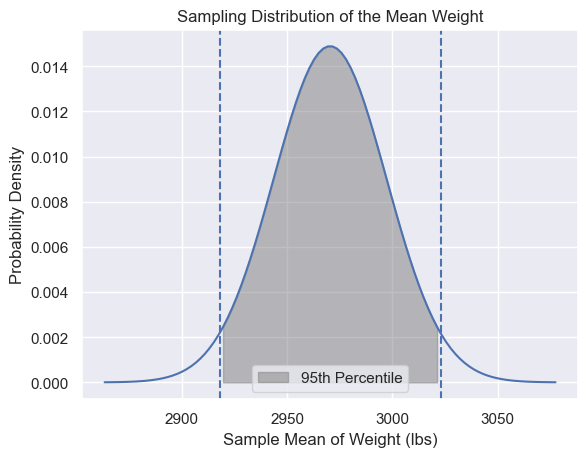

In [73]:
population_mean = cars['weight'].mean() # caculates the mean of population
population_std = cars['weight'].std() # caculates standard deviation
# Define the parameters for the alternate hypothesis
sample_size = 1000  # Size of the sample
standard_error = population_std / np.sqrt(sample_size)  # Standard error
# creates random variable
sampling_distribution_null = stats.norm(population_mean, 
                                        population_std / np.sqrt(sample_size))
# rv_alt = norm(loc=sample_mean_alt, scale=standard_error_alt)

x = np.linspace(population_mean - 4 * (population_std / np.sqrt(sample_size)), 
                population_mean + 4 * population_std / np.sqrt(sample_size), 100)

percentile_95 = sampling_distribution_null.ppf(0.975)
percentile_5 = sampling_distribution_null.ppf(0.025)
sns.set_theme()
plt.plot(x, sampling_distribution_null.pdf(x))
plt.axvline(percentile_95, linestyle="--")
plt.axvline(percentile_5, linestyle="--")

# This code shades the area that is between the 95th percentile
plt.fill_between(x, sampling_distribution_null.pdf(x), where=(x <= percentile_95) & (x >= percentile_5) , color='gray', alpha=0.5, label="95th Percentile") 
plt.xlabel('Sample Mean of Weight (lbs)')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean Weight')
plt.legend()
plt.show()

In [74]:
# Origin 1 = United States
# Origin 2 = Germany
# Origin 3 = Japan


us_cars = cars[cars['origin'] == 1][['mpg', 'model', 'origin', 'car_name']]
print(us_cars)


german_cars = cars[cars['origin'] == 2][['mpg', 'model', 'origin', 'car_name']]
print(german_cars)


japanese_cars = cars[cars['origin'] == 3][['mpg', 'model', 'origin', 'car_name']]
print(japanese_cars)

      mpg  model  origin                   car_name
0    18.0     70       1  chevrolet chevelle malibu
1    15.0     70       1          buick skylark 320
2    18.0     70       1         plymouth satellite
3    16.0     70       1              amc rebel sst
4    17.0     70       1                ford torino
..    ...    ...     ...                        ...
392  27.0     82       1           chevrolet camaro
393  27.0     82       1            ford mustang gl
395  32.0     82       1              dodge rampage
396  28.0     82       1                ford ranger
397  31.0     82       1                 chevy s-10

[249 rows x 4 columns]
      mpg  model  origin                      car_name
19   26.0     70       2  volkswagen 1131 deluxe sedan
20   25.0     70       2                   peugeot 504
21   24.0     70       2                   audi 100 ls
22   25.0     70       2                      saab 99e
23   26.0     70       2                      bmw 2002
..    ...    ...     .

In [75]:
# Calculate mean 'mpg' for each origin
us_mean_mpg = us_cars['mpg'].mean()
german_mean_mpg = german_cars['mpg'].mean()
japanese_mean_mpg = japanese_cars['mpg'].mean()

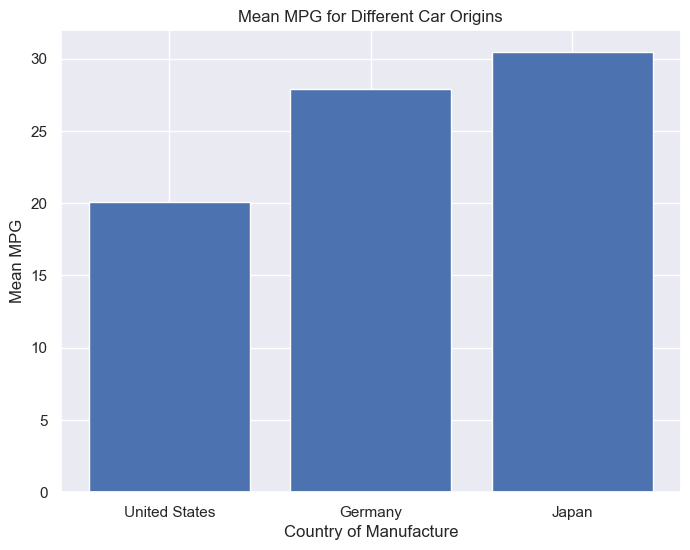

In [76]:
# Create a bar chart for mean 'mpg' of each origin
plt.figure(figsize=(8, 6))
plt.bar(['United States', 'Germany', 'Japan'], [us_mean_mpg, german_mean_mpg, japanese_mean_mpg])
plt.xlabel('Country of Manufacture')
plt.ylabel('Mean MPG')
plt.title('Mean MPG for Different Car Origins')
plt.grid(True)
plt.show()

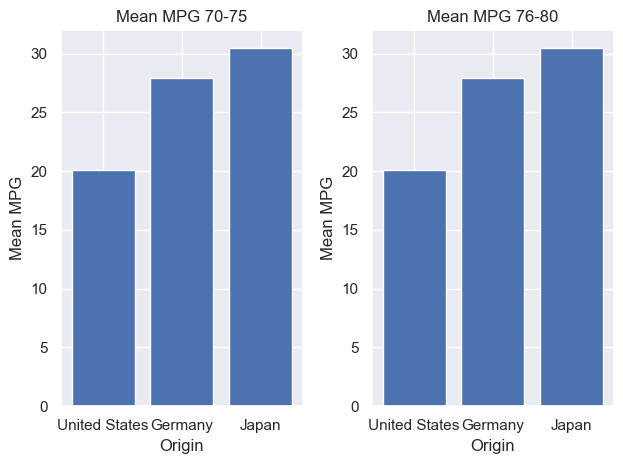

In [77]:
# created variables to pull data from each separate country and model years 1970-1975
us_cars_70_75 = cars[(cars['origin'] == 1) & (cars['model'].between(70, 75))]
german_cars_70_75 = cars[(cars['origin'] == 2) & (cars['model'].between(70, 75))]
japanese_cars_70_75 = cars[(cars['origin'] == 3) & (cars['model'].between(70, 75))]

# created variables to pull data from each separate country and model years 1976-1980
us_cars_76_80 = cars[(cars['origin'] == 1) & (cars['model'].between(76, 80))]
german_cars_76_80 = cars[(cars['origin'] == 2) & (cars['model'].between(76, 80))]
japanese_cars_76_80 = cars[(cars['origin'] == 3) & (cars['model'].between(76, 80))]

# Calculate mean 'mpg' for each origin and model range 1970-1975
us_cars_70_75 = us_cars['mpg'].mean()
german_cars_70_75 = german_cars['mpg'].mean()
japanese_cars_70_75 = japanese_cars['mpg'].mean()

# Calculate mean 'mpg' for each origin and model range 1976-1980
us_cars_76_80 = us_cars['mpg'].mean()
german_cars_76_80 = german_cars['mpg'].mean()
japanese_cars_76_80 = japanese_cars['mpg'].mean()

# Bar chart for model years 70-75
plt.subplot(1, 2, 1)
plt.bar(['United States', 'Germany', 'Japan'], [us_cars_70_75, german_cars_70_75, japanese_cars_70_75])
plt.xlabel('Origin')
plt.ylabel('Mean MPG')
plt.title('Mean MPG 70-75')

# Bar chart for model years 76-80
plt.subplot(1, 2, 2)
plt.bar(['United States', 'Germany', 'Japan'], [us_cars_76_80, german_cars_76_80, japanese_cars_76_80])
plt.xlabel('Origin')
plt.ylabel('Mean MPG')
plt.title('Mean MPG 76-80')

plt.tight_layout()
plt.show()

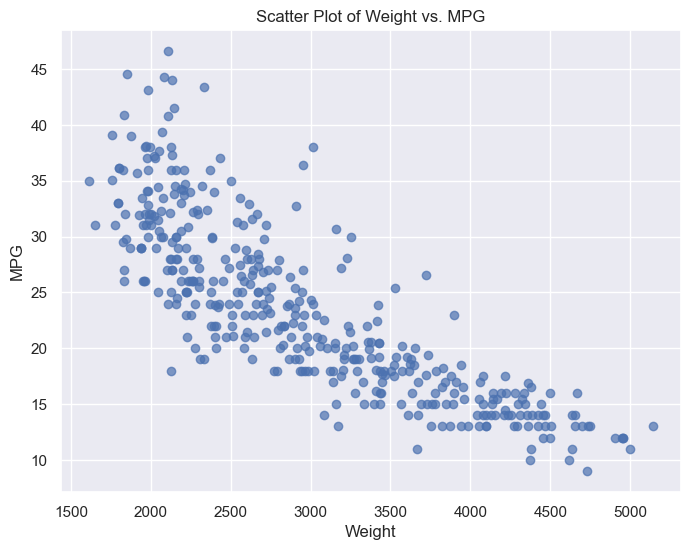

In [78]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(cars['weight'], cars['mpg'], marker='o', color='b', alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Scatter Plot of Weight vs. MPG')
plt.grid(True)
plt.show()

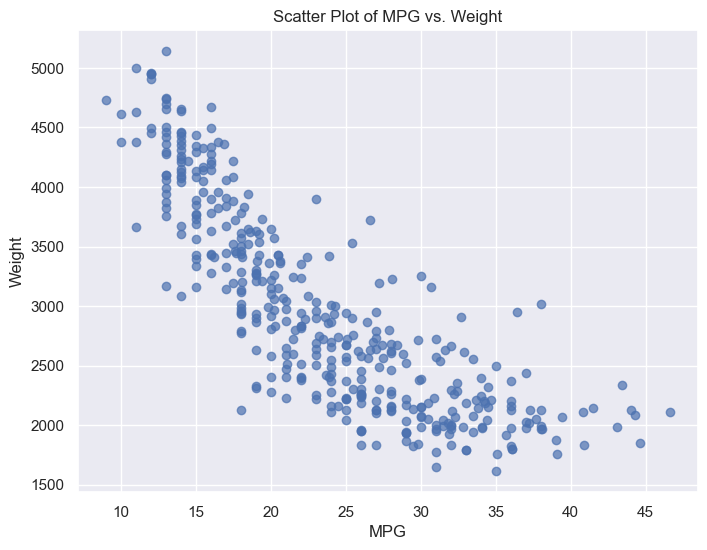

Correlation Coefficient: -0.8317409332443345


In [79]:


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(cars['mpg'], cars['weight'], marker='o', color='b', alpha=0.7)
plt.xlabel('MPG')
plt.ylabel('Weight')
plt.title('Scatter Plot of MPG vs. Weight')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = cars['mpg'].corr(cars['weight'])
print("Correlation Coefficient:", correlation_coefficient)

In [80]:
# Separate data into two groups: MPG for low weight and MPG for high weight
low_weight_mpg = cars[cars['weight'] <= cars['weight'].median()]['mpg']
high_weight_mpg = cars[cars['weight'] > cars['weight'].median()]['mpg']

# Perform independent t-test
t_stat, p_value = ttest_ind(low_weight_mpg, high_weight_mpg)

# Define significance level (alpha)
alpha = 0.05

# Compare p-value with alpha to make the decision
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant change in MPG in relation to the vehicle weight.")
else:
    print("Fail to reject the null hypothesis: There is no significant change in MPG in relation to the vehicle weight.")


Reject the null hypothesis: There is a significant change in MPG in relation to the vehicle weight.


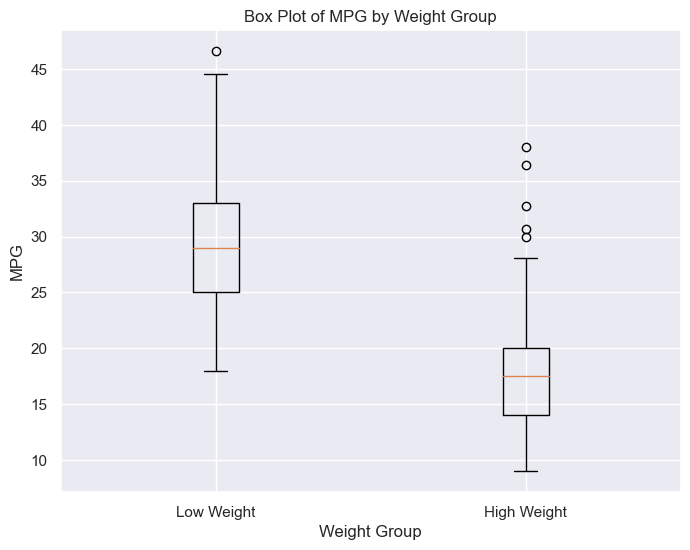

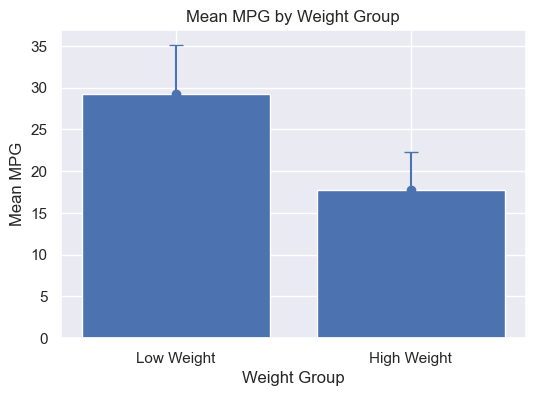

Independent t-test:
T-statistic: 22.027557026266127
P-value: 8.894257977335231e-71


In [81]:
# Separate data into two groups: low weight and high weight
low_weight_mpg = cars[cars['weight'] <= cars['weight'].median()]['mpg']
high_weight_mpg = cars[cars['weight'] > cars['weight'].median()]['mpg']

# Perform independent t-test
t_stat, p_value = ttest_ind(low_weight_mpg, high_weight_mpg)

# Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot([low_weight_mpg, high_weight_mpg], labels=['Low Weight', 'High Weight'])
plt.xlabel('Weight Group')
plt.ylabel('MPG')
plt.title('Box Plot of MPG by Weight Group')
plt.grid(True)
plt.show()

# Bar Plot
plt.figure(figsize=(6, 4))
plt.bar(['Low Weight', 'High Weight'], [low_weight_mpg.mean(), high_weight_mpg.mean()])
plt.errorbar(['Low Weight', 'High Weight'], [low_weight_mpg.mean(), high_weight_mpg.mean()], yerr=[low_weight_mpg.std(), high_weight_mpg.std()], fmt='o', capsize=5)
plt.xlabel('Weight Group')
plt.ylabel('Mean MPG')
plt.title('Mean MPG by Weight Group')
plt.grid(True)
plt.show()

# Print t-test results
print("Independent t-test:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

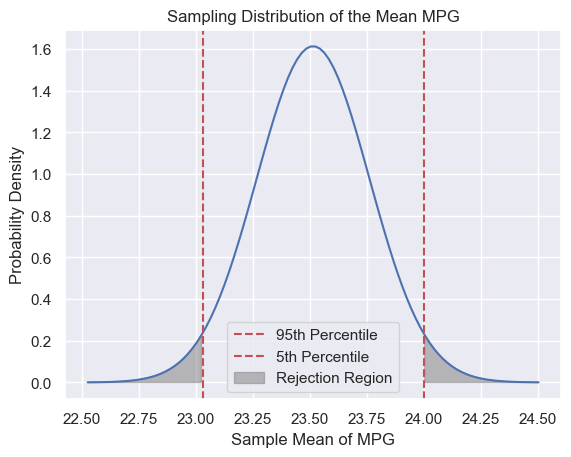

In [82]:
# Calculate population mean and standard deviation
population_mean = cars['mpg'].mean()
population_std = cars['mpg'].std()

# Define the parameters for the null hypothesis (assuming sample mean equals population mean)
sample_size = 1000  # Size of the sample
standard_error = population_std / np.sqrt(sample_size)  # Standard error

# Create random variable for the null hypothesis (assuming sample mean equals population mean)
sampling_distribution_null = stats.norm(population_mean, standard_error)

# Generate x values for the plot
x = np.linspace(population_mean - 4 * standard_error, population_mean + 4 * standard_error, 100)

# Calculate the 95th and 5th percentiles
percentile_95 = sampling_distribution_null.ppf(0.975)
percentile_5 = sampling_distribution_null.ppf(0.025)

# Plot the sampling distribution
sns.set_theme()
plt.plot(x, sampling_distribution_null.pdf(x))
plt.axvline(percentile_95, linestyle="--", color='r', label='95th Percentile')
plt.axvline(percentile_5, linestyle="--", color='r', label='5th Percentile')

# Shade the area representing the two-tailed test region
plt.fill_between(x, sampling_distribution_null.pdf(x), where=(x <= percentile_5) | (x >= percentile_95),
                 color='gray', alpha=0.5, label='Rejection Region')

plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG')
plt.legend()
plt.show()

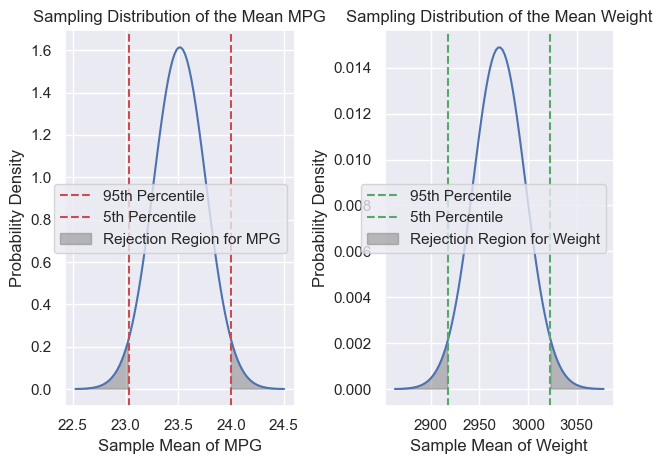

In [85]:
# Calculate population mean and standard deviation of 'mpg' and 'weight'
population_mean_mpg = cars['mpg'].mean()
population_std_mpg = cars['mpg'].std()
population_mean_weight = cars['weight'].mean()
population_std_weight = cars['weight'].std()

# Define the parameters for the null hypothesis (assuming sample mean equals population mean)
sample_size = 1000  # Size of the sample
standard_error_mpg = population_std_mpg / np.sqrt(sample_size)  # Standard error for 'mpg'
standard_error_weight = population_std_weight / np.sqrt(sample_size)  # Standard error for 'weight'

# Create random variables for the null hypothesis (assuming sample mean equals population mean)
sampling_distribution_null_mpg = stats.norm(population_mean_mpg, standard_error_mpg)
sampling_distribution_null_weight = stats.norm(population_mean_weight, standard_error_weight)

# Generate x values for the plot
x_mpg = np.linspace(population_mean_mpg - 4 * standard_error_mpg, population_mean_mpg + 4 * standard_error_mpg, 100)
x_weight = np.linspace(population_mean_weight - 4 * standard_error_weight, population_mean_weight + 4 * standard_error_weight, 100)

# Calculate the 95th and 5th percentiles for both 'mpg' and 'weight'
percentile_95_mpg = sampling_distribution_null_mpg.ppf(0.975)
percentile_5_mpg = sampling_distribution_null_mpg.ppf(0.025)
percentile_95_weight = sampling_distribution_null_weight.ppf(0.975)
percentile_5_weight = sampling_distribution_null_weight.ppf(0.025)

# Plot the sampling distributions for both 'mpg' and 'weight'
sns.set_theme()

# For 'mpg'
plt.subplot(1, 2, 1)
plt.plot(x_mpg, sampling_distribution_null_mpg.pdf(x_mpg))
plt.axvline(percentile_95_mpg, linestyle="--", color='r', label='95th Percentile')
plt.axvline(percentile_5_mpg, linestyle="--", color='r', label='5th Percentile')
plt.fill_between(x_mpg, sampling_distribution_null_mpg.pdf(x_mpg),
                 where=(x_mpg <= percentile_5_mpg) | (x_mpg >= percentile_95_mpg),
                 color='gray', alpha=0.5, label='Rejection Region for MPG')
plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG')
plt.legend()

# For 'weight'
plt.subplot(1, 2, 2)
plt.plot(x_weight, sampling_distribution_null_weight.pdf(x_weight))
plt.axvline(percentile_95_weight, linestyle="--", color='g', label='95th Percentile')
plt.axvline(percentile_5_weight, linestyle="--", color='g', label='5th Percentile')
plt.fill_between(x_weight, sampling_distribution_null_weight.pdf(x_weight),
                 where=(x_weight <= percentile_5_weight) | (x_weight >= percentile_95_weight),
                 color='gray', alpha=0.5, label='Rejection Region for Weight')
plt.xlabel('Sample Mean of Weight')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean Weight')
plt.legend()

plt.tight_layout()
plt.show()

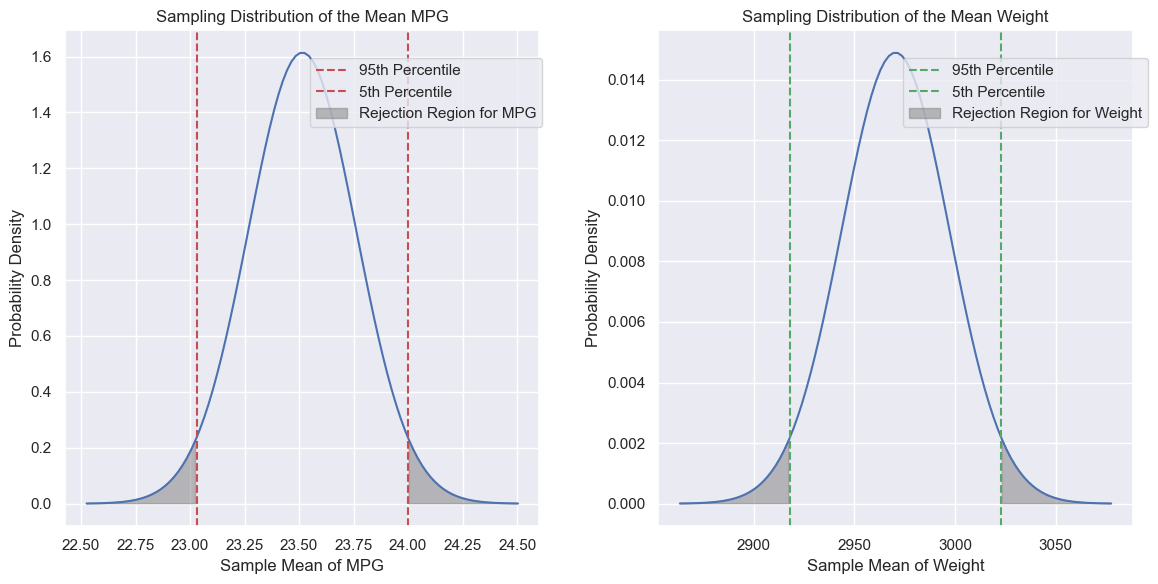

In [86]:
# Calculate population mean and standard deviation of 'mpg' and 'weight'
population_mean_mpg = cars['mpg'].mean()
population_std_mpg = cars['mpg'].std()
population_mean_weight = cars['weight'].mean()
population_std_weight = cars['weight'].std()

# Define the parameters for the null hypothesis (assuming sample mean equals population mean)
sample_size = 1000  # Size of the sample
standard_error_mpg = population_std_mpg / np.sqrt(sample_size)  # Standard error for 'mpg'
standard_error_weight = population_std_weight / np.sqrt(sample_size)  # Standard error for 'weight'

# Create random variables for the null hypothesis (assuming sample mean equals population mean)
sampling_distribution_null_mpg = stats.norm(population_mean_mpg, standard_error_mpg)
sampling_distribution_null_weight = stats.norm(population_mean_weight, standard_error_weight)

# Generate x values for the plot
x_mpg = np.linspace(population_mean_mpg - 4 * standard_error_mpg, population_mean_mpg + 4 * standard_error_mpg, 100)
x_weight = np.linspace(population_mean_weight - 4 * standard_error_weight, population_mean_weight + 4 * standard_error_weight, 100)

# Calculate the 95th and 5th percentiles for both 'mpg' and 'weight'
percentile_95_mpg = sampling_distribution_null_mpg.ppf(0.975)
percentile_5_mpg = sampling_distribution_null_mpg.ppf(0.025)
percentile_95_weight = sampling_distribution_null_weight.ppf(0.975)
percentile_5_weight = sampling_distribution_null_weight.ppf(0.025)

# Create a new figure and add subplots
plt.figure(figsize=(12, 6))

# For 'mpg'
plt.subplot(1, 2, 1)
plt.plot(x_mpg, sampling_distribution_null_mpg.pdf(x_mpg))
plt.axvline(percentile_95_mpg, linestyle="--", color='r', label='95th Percentile')
plt.axvline(percentile_5_mpg, linestyle="--", color='r', label='5th Percentile')
plt.fill_between(x_mpg, sampling_distribution_null_mpg.pdf(x_mpg),
                 where=(x_mpg <= percentile_5_mpg) | (x_mpg >= percentile_95_mpg),
                 color='gray', alpha=0.5, label='Rejection Region for MPG')
plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 0.96))  # Set the legend under the title

# For 'weight'
plt.subplot(1, 2, 2)
plt.plot(x_weight, sampling_distribution_null_weight.pdf(x_weight))
plt.axvline(percentile_95_weight, linestyle="--", color='g', label='95th Percentile')
plt.axvline(percentile_5_weight, linestyle="--", color='g', label='5th Percentile')
plt.fill_between(x_weight, sampling_distribution_null_weight.pdf(x_weight),
                 where=(x_weight <= percentile_5_weight) | (x_weight >= percentile_95_weight),
                 color='gray', alpha=0.5, label='Rejection Region for Weight')
plt.xlabel('Sample Mean of Weight')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean Weight')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 0.96))  # Set the legend under the title

plt.tight_layout()
plt.show()

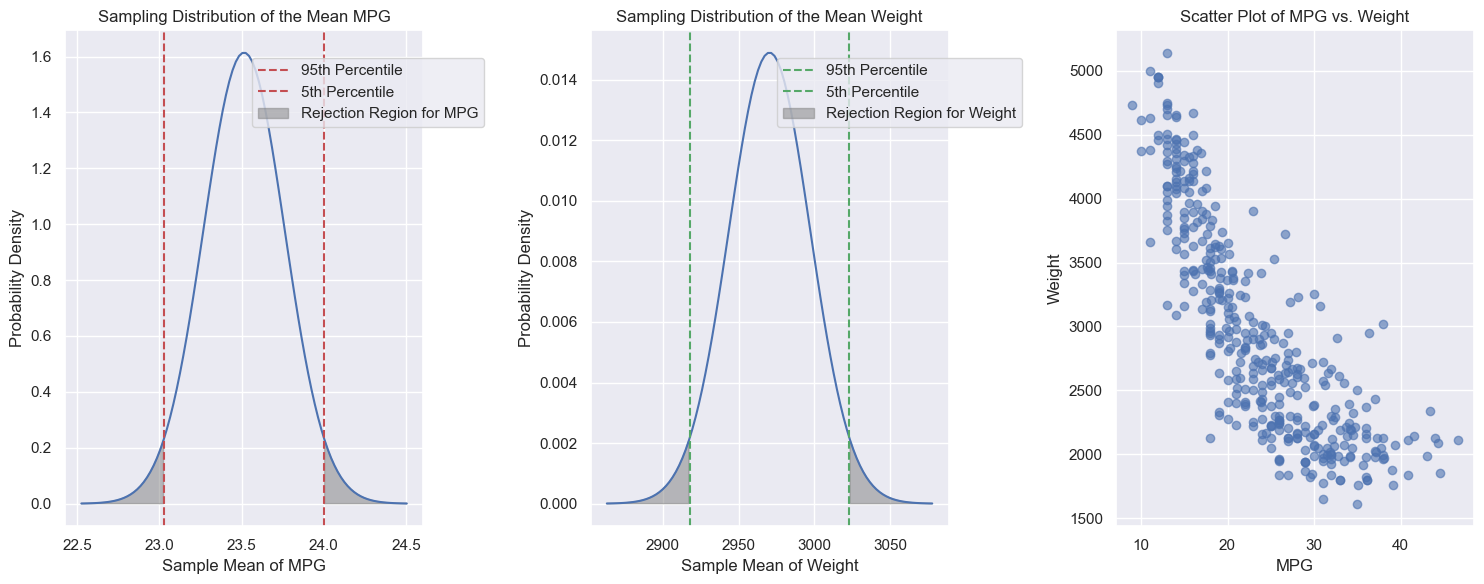

In [89]:
# Calculate population mean and standard deviation of 'mpg' and 'weight'
population_mean_mpg = cars['mpg'].mean()
population_std_mpg = cars['mpg'].std()
population_mean_weight = cars['weight'].mean()
population_std_weight = cars['weight'].std()

# Define the parameters for the null hypothesis (assuming sample mean equals population mean)
sample_size = 1000  # Size of the sample
standard_error_mpg = population_std_mpg / np.sqrt(sample_size)  # Standard error for 'mpg'
standard_error_weight = population_std_weight / np.sqrt(sample_size)  # Standard error for 'weight'

# Create random variables for the null hypothesis (assuming sample mean equals population mean)
sampling_distribution_null_mpg = stats.norm(population_mean_mpg, standard_error_mpg)
sampling_distribution_null_weight = stats.norm(population_mean_weight, standard_error_weight)

# Generate x values for the plot
x_mpg = np.linspace(population_mean_mpg - 4 * standard_error_mpg, population_mean_mpg + 4 * standard_error_mpg, 100)
x_weight = np.linspace(population_mean_weight - 4 * standard_error_weight, population_mean_weight + 4 * standard_error_weight, 100)

# Calculate the 95th and 5th percentiles for both 'mpg' and 'weight'
percentile_95_mpg = sampling_distribution_null_mpg.ppf(0.975)
percentile_5_mpg = sampling_distribution_null_mpg.ppf(0.025)
percentile_95_weight = sampling_distribution_null_weight.ppf(0.975)
percentile_5_weight = sampling_distribution_null_weight.ppf(0.025)

# Create a new figure and add subplots
plt.figure(figsize=(15, 6))

# For 'mpg' sampling distribution
plt.subplot(1, 3, 1)
plt.plot(x_mpg, sampling_distribution_null_mpg.pdf(x_mpg))
plt.axvline(percentile_95_mpg, linestyle="--", color='r', label='95th Percentile')
plt.axvline(percentile_5_mpg, linestyle="--", color='r', label='5th Percentile')
plt.fill_between(x_mpg, sampling_distribution_null_mpg.pdf(x_mpg),
                 where=(x_mpg <= percentile_5_mpg) | (x_mpg >= percentile_95_mpg),
                 color='gray', alpha=0.5, label='Rejection Region for MPG')
plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 0.96))  # Set the legend under the title

# For 'weight' sampling distribution
plt.subplot(1, 3, 2)
plt.plot(x_weight, sampling_distribution_null_weight.pdf(x_weight))
plt.axvline(percentile_95_weight, linestyle="--", color='g', label='95th Percentile')
plt.axvline(percentile_5_weight, linestyle="--", color='g', label='5th Percentile')
plt.fill_between(x_weight, sampling_distribution_null_weight.pdf(x_weight),
                 where=(x_weight <= percentile_5_weight) | (x_weight >= percentile_95_weight),
                 color='gray', alpha=0.5, label='Rejection Region for Weight')
plt.xlabel('Sample Mean of Weight')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean Weight')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 0.96))  # Set the legend under the title

# For Scatter plot of 'mpg' vs. 'weight'
plt.subplot(1, 3, 3)
plt.scatter(cars['mpg'], cars['weight'], alpha=0.6)
plt.xlabel('MPG')
plt.ylabel('Weight')
plt.title('Scatter Plot of MPG vs. Weight')

plt.tight_layout()
plt.show()

In [94]:
print(cars['mpg'].max())
print(cars['mpg'].min())

46.6
9.0


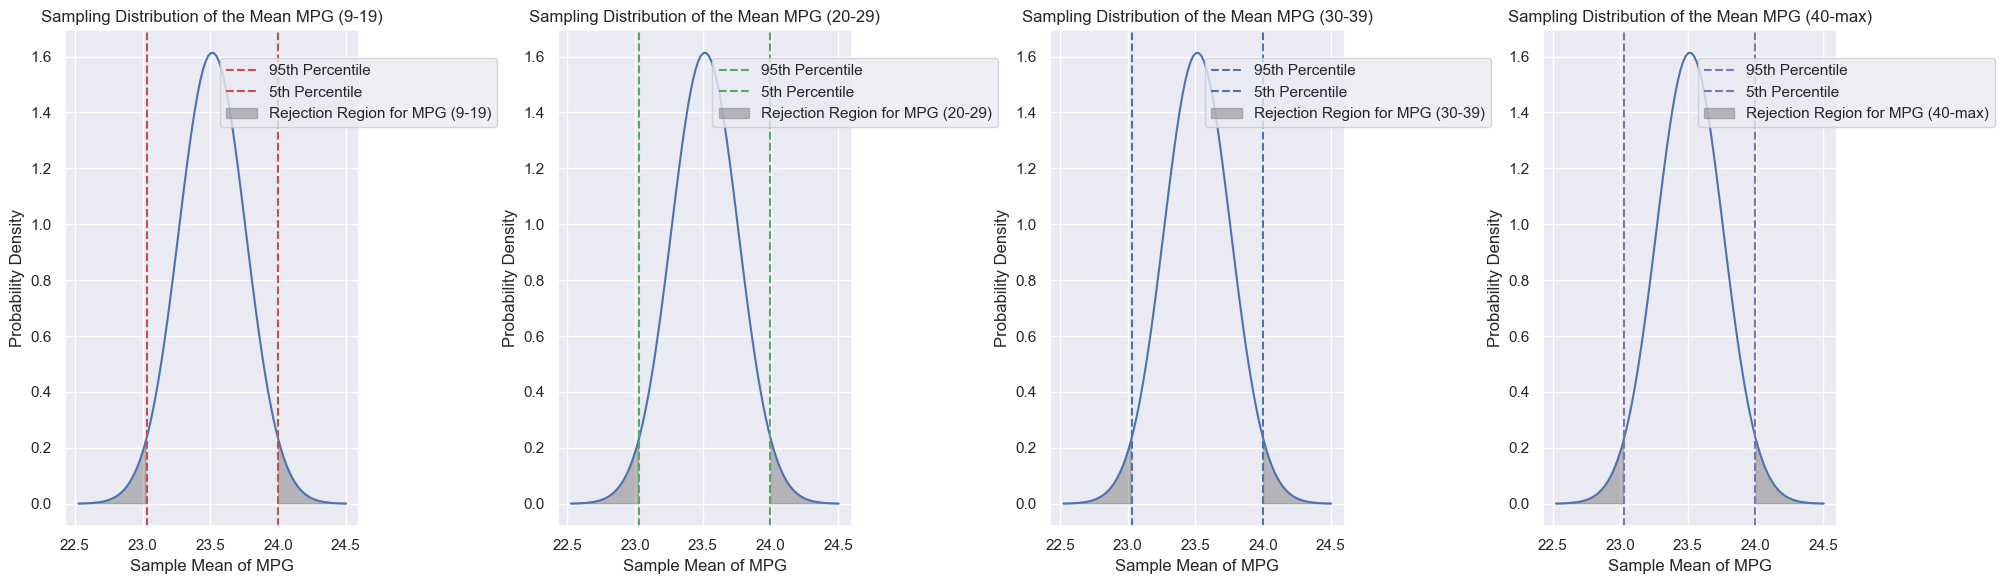

In [95]:
# Calculate population mean and standard deviation of 'mpg'
population_mean_mpg = cars['mpg'].mean()
population_std_mpg = cars['mpg'].std()

# Define the parameters for the null hypothesis (assuming sample mean equals population mean)
sample_size = 1000  # Size of the sample
standard_error_mpg = population_std_mpg / np.sqrt(sample_size)  # Standard error for 'mpg'

# Create random variables for the null hypothesis (assuming sample mean equals population mean)
sampling_distribution_null_mpg_9_19 = stats.norm(population_mean_mpg, standard_error_mpg)
sampling_distribution_null_mpg_20_29 = stats.norm(population_mean_mpg, standard_error_mpg)
sampling_distribution_null_mpg_30_39 = stats.norm(population_mean_mpg, standard_error_mpg)
sampling_distribution_null_mpg_40_max = stats.norm(population_mean_mpg, standard_error_mpg)

# Generate x values for the plots
x_mpg_9_19 = np.linspace(population_mean_mpg - 4 * standard_error_mpg, population_mean_mpg + 4 * standard_error_mpg, 100)
x_mpg_20_29 = np.linspace(population_mean_mpg - 4 * standard_error_mpg, population_mean_mpg + 4 * standard_error_mpg, 100)
x_mpg_30_39 = np.linspace(population_mean_mpg - 4 * standard_error_mpg, population_mean_mpg + 4 * standard_error_mpg, 100)
x_mpg_40_max = np.linspace(population_mean_mpg - 4 * standard_error_mpg, population_mean_mpg + 4 * standard_error_mpg, 100)

# Calculate the 95th and 5th percentiles for each range
percentile_95_mpg_9_19 = sampling_distribution_null_mpg_9_19.ppf(0.975)
percentile_5_mpg_9_19 = sampling_distribution_null_mpg_9_19.ppf(0.025)
percentile_95_mpg_20_29 = sampling_distribution_null_mpg_20_29.ppf(0.975)
percentile_5_mpg_20_29 = sampling_distribution_null_mpg_20_29.ppf(0.025)
percentile_95_mpg_30_39 = sampling_distribution_null_mpg_30_39.ppf(0.975)
percentile_5_mpg_30_39 = sampling_distribution_null_mpg_30_39.ppf(0.025)
percentile_95_mpg_40_max = sampling_distribution_null_mpg_40_max.ppf(0.975)
percentile_5_mpg_40_max = sampling_distribution_null_mpg_40_max.ppf(0.025)

# Create a new figure and add subplots
plt.figure(figsize=(20, 6))

# For 'mpg' sampling distribution (9-19 range)
plt.subplot(1, 4, 1)
plt.plot(x_mpg_9_19, sampling_distribution_null_mpg_9_19.pdf(x_mpg_9_19))
plt.axvline(percentile_95_mpg_9_19, linestyle="--", color='r', label='95th Percentile')
plt.axvline(percentile_5_mpg_9_19, linestyle="--", color='r', label='5th Percentile')
plt.fill_between(x_mpg_9_19, sampling_distribution_null_mpg_9_19.pdf(x_mpg_9_19),
                 where=(x_mpg_9_19 <= percentile_5_mpg_9_19) | (x_mpg_9_19 >= percentile_95_mpg_9_19),
                 color='gray', alpha=0.5, label='Rejection Region for MPG (9-19)')
plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG (9-19)')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 0.96))  # Set the legend under the title

# For 'mpg' sampling distribution (20-29 range)
plt.subplot(1, 4, 2)
plt.plot(x_mpg_20_29, sampling_distribution_null_mpg_20_29.pdf(x_mpg_20_29))
plt.axvline(percentile_95_mpg_20_29, linestyle="--", color='g', label='95th Percentile')
plt.axvline(percentile_5_mpg_20_29, linestyle="--", color='g', label='5th Percentile')
plt.fill_between(x_mpg_20_29, sampling_distribution_null_mpg_20_29.pdf(x_mpg_20_29),
                 where=(x_mpg_20_29 <= percentile_5_mpg_20_29) | (x_mpg_20_29 >= percentile_95_mpg_20_29),
                 color='gray', alpha=0.5, label='Rejection Region for MPG (20-29)')
plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG (20-29)')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 0.96))  # Set the legend under the title

# For 'mpg' sampling distribution (30-39 range)
plt.subplot(1, 4, 3)
plt.plot(x_mpg_30_39, sampling_distribution_null_mpg_30_39.pdf(x_mpg_30_39))
plt.axvline(percentile_95_mpg_30_39, linestyle="--", color='b', label='95th Percentile')
plt.axvline(percentile_5_mpg_30_39, linestyle="--", color='b', label='5th Percentile')
plt.fill_between(x_mpg_30_39, sampling_distribution_null_mpg_30_39.pdf(x_mpg_30_39),
                 where=(x_mpg_30_39 <= percentile_5_mpg_30_39) | (x_mpg_30_39 >= percentile_95_mpg_30_39),
                 color='gray', alpha=0.5, label='Rejection Region for MPG (30-39)')
plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG (30-39)')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 0.96))  # Set the legend under the title

# For 'mpg' sampling distribution (40-max range)
plt.subplot(1, 4, 4)
plt.plot(x_mpg_40_max, sampling_distribution_null_mpg_40_max.pdf(x_mpg_40_max))
plt.axvline(percentile_95_mpg_40_max, linestyle="--", color='m', label='95th Percentile')
plt.axvline(percentile_5_mpg_40_max, linestyle="--", color='m', label='5th Percentile')
plt.fill_between(x_mpg_40_max, sampling_distribution_null_mpg_40_max.pdf(x_mpg_40_max),
                 where=(x_mpg_40_max <= percentile_5_mpg_40_max) | (x_mpg_40_max >= percentile_95_mpg_40_max),
                 color='gray', alpha=0.5, label='Rejection Region for MPG (40-max)')
plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG (40-max)')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 0.96))  # Set the legend under the title

plt.tight_layout()
plt.show()

In [100]:
# Linear Regression commands and arugments taken from https://www.statsmodels.org/stable/regression.html

# Select the 'mpg' and 'weight' columns for the regression
X = cars['weight']
y = cars['mpg']

# Add a constant term to the independent variable for the intercept term in the regression
X = sm.add_constant(X)

# Create the linear regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          2.97e-103
Time:                        13:36:50   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.0

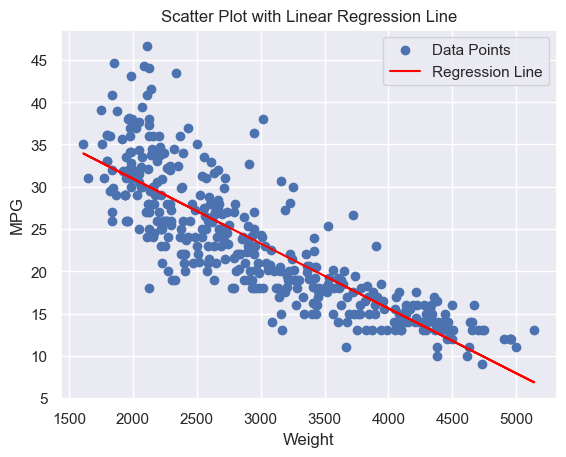

In [101]:
# Scatter plot of 'mpg' vs 'weight'
plt.scatter(cars['weight'], cars['mpg'], label='Data Points')
plt.plot(cars['weight'], results.fittedvalues, color='red', label='Regression Line')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()
plt.show()

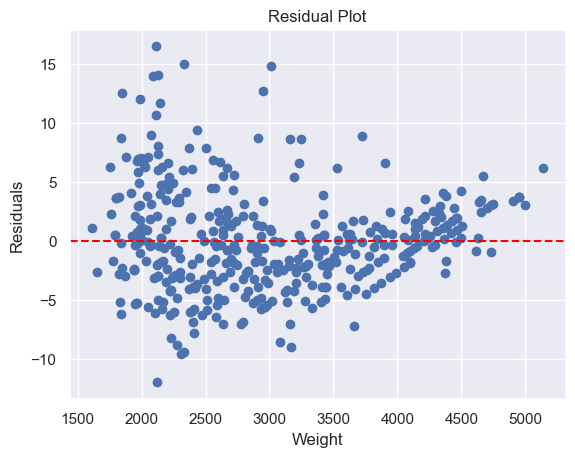

In [102]:
# Residual plot
residuals = results.resid
plt.scatter(cars['weight'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Weight')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [105]:
# Predict 'mpg' for a new value of 'weight'
new_weight = 3000
predicted_mpg = results.predict([1, new_weight])  # Add a constant term as well
print("Predicted MPG for weight", new_weight, ":", predicted_mpg[0])


Predicted MPG for weight 3000 : 23.28753422848622


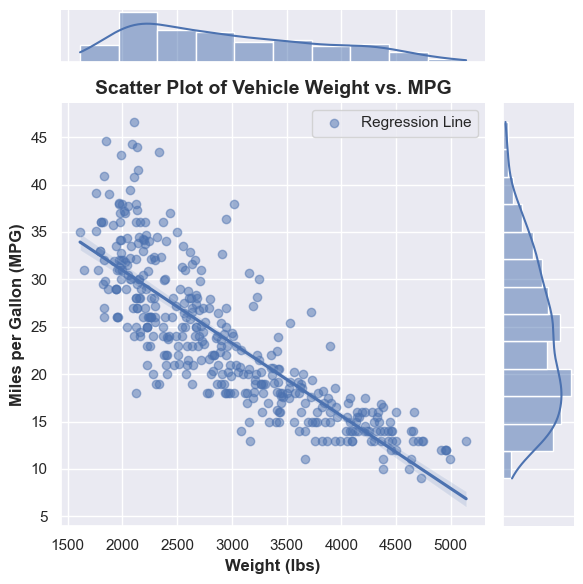

In [114]:

sns.set_theme()  # Set the default aesthetic parameters for the seaborn library
joint_plot = sns.jointplot(x='weight', y='mpg', data=cars, kind='reg', scatter_kws={'alpha': 0.5})


joint_plot.ax_joint.legend(labels=['Regression Line'], loc='upper right')

# Add labels and title to the plot
plt.xlabel('Weight (lbs)', fontsize=12, fontweight='bold')  # Label for the x-axis (Weight in pounds)
plt.ylabel('Miles per Gallon (MPG)', fontsize=12, fontweight='bold')  # Label for the y-axis (Fuel efficiency in MPG)
plt.title('Scatter Plot of Vehicle Weight vs. MPG', fontsize=14, fontweight='bold')  # Plot title

plt.tight_layout()

# Display the plot
plt.show()
